<a href="https://colab.research.google.com/github/puzzlecollector0418/ASCIIart/blob/master/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>

Hey this is Luke Kim! 

Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
from sklearn.datasets import load_diabetes 
diabetes = load_diabetes() 

In [0]:
import matplotlib.pyplot as plt 
import numpy as np 

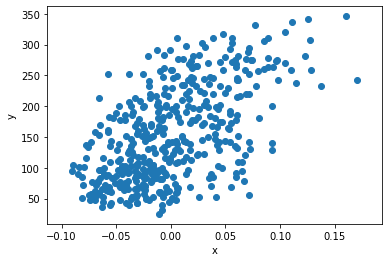

In [0]:
plt.scatter(diabetes.data[:,2],diabetes.target) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.show() 

In [0]:
x = diabetes.data[:,2] 
y = diabetes.target 

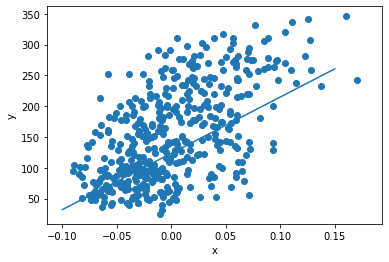

In [0]:
class Neuron: 
  def __init__(self): 
    self.w = 1.0 
    self.b = 1.0 
  
  def forpass(self,x): 
    y_hat = x*self.w + self.b 
    return y_hat 

  def backprop(self,x,err): 
    w_grad = x*err 
    b_grad = 1*err 
    return w_grad,b_grad 
  
  def fit(self,x,y,epochs=100): 
    for i in range(epochs): 
      for x_i,y_i in zip(x,y): 
        y_hat = self.forpass(x_i) 
        err = -(y_i-y_hat)
        w_grad, b_grad = self.backprop(x_i,err) 
        self.w -= w_grad
        self.b -= b_grad 

neuron = Neuron() 
neuron.fit(x,y) 
plt.scatter(x,y) 
pt1 = (-0.1,-0.1*neuron.w + neuron.b) 
pt2 = (0.15,0.15*neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]]) 
plt.xlabel('x')
plt.ylabel('y')
plt.show() 



In [0]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()  

In [0]:
x = cancer.data
y = cancer.target 

In [0]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify = y,test_size = 0.2,random_state=42)
print(x_train.shape,x_test.shape)

(455, 30) (114, 30)


In [0]:
import numpy as np
class LogisticNeuron:
  def __init__(self): 
    self.w = None 
    self.b = None 

  def forpass(self,x): 
    z = np.sum(x*self.w) + self.b # linear equation 
    return z 

  def backprop(self,x,err): 
    w_grad = x*err 
    b_grad = 1*err 
    return w_grad, b_grad 

  def activation(self,z): 
    a = 1/(1+np.exp(-z)) 
    return a 
  
  def fit(self,x,y,epochs=100): 
    self.w = np.ones(x.shape[1]) 
    self.b = 0 
    for i in range(epochs): 
      for x_i,y_i in zip(x,y): 
        z = self.forpass(x_i) 
        a = self.activation(z) 
        err = -(y_i-a) 
        w_grad, b_grad = self.backprop(x_i,err) 
        self.w -= w_grad 
        self.b -= b_grad 
  
  def predict(self,x): 
    z = [self.forpass(x_i) for x_i in x] 
    a = self.activation(np.array(z)) 
    return a > 0.5 

In [0]:
neuron = LogisticNeuron() 
neuron.fit(x_train,y_train) 
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.8245614035087719

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer() 
x = cancer.data 
y = cancer.target 
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all,y_train_all,stratify=y_train_all,test_size=0.2,random_state=42) 
print(x_train.shape,x_val.shape)  

(364, 30) (91, 30)


In [0]:
class SingleLayer: 
  def __init__(self,learning_rate=0.1,l1=0,l2=0):  
    self.w = None 
    self.b = None 
    self.losses = [] 
    self.val_losses = [] 
    self.w_history = [] 
    self.lr = learning_rate 
    self.l1 = l1
    self.l2 = l2 
  
  def forpass(self,x): 
    z = np.dot(x,self.w) + self.b 
    return z 

  def backprop(self,x,err): 
    m = len(x) 
    w_grad = np.dot(x.T,err)/m 
    b_grad = np.sum(err)/m 
    return w_grad, b_grad 

  def activation(self,z): 
    a = 1/(1+np.exp(-z))
    return a 
  
  def fit(self,x,y,epochs=100,x_val=None,y_val=None): 
    y = y.reshape(-1,1) # change to column vector 
    y_val = y_val.reshape(-1,1) 
    m = len(x) 
    self.w = np.ones((x.shape[1],1))
    self.b = 0 
    self.w_history.append(self.w.copy()) 
    for i in range(epochs): 
      z = self.forpass(x)  
      a = self.activation(z) 
      err = -(y-a) 
      w_grad, b_grad = self.backprop(x,err) 
      w_grad += (self.l1*np.sign(self.w) + self.l2*self.w)/m  
      self.w -= self.lr * w_grad
      self.b -= self.lr * b_grad 
      self.w_history.append(self.w.copy())
      a = np.clip(a,1e-10,1-1e-10)
      loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
      self.losses.append((loss+self.reg_loss())/m)
      self.update_val_loss(x_val,y_val) 
  
  def predict(self,x): 
    z = self.forpass(x) 
    return z > 0 
  
  def score(self,x,y): 
    return np.mean(self.predict(x) == y.reshape(-1,1))

  def reg_loss(self): 
    return self.l1*np.sum(np.abs(self.w)) + self.l2/2 * np.sum(self.w**2) 

  def update_val_loss(self,x_val,y_val): 
    z = self.forpass(x_val) 
    a = self.activation(z) 
    a = np.clip(a,1e-10,1-1e-10) 
    val_loss = np.sum(-(y_val * np.log(a) + (1-y_val)*np.log(1-a))) 
    self.val_losses.append((val_loss + self.reg_loss())/len(y_val))
 

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val) 

single_layer = SingleLayer(l2=0.01) 
single_layer.fit(x_train_scaled,y_train,x_val=x_val_scaled,y_val=y_val,epochs=10000) 
single_layer.score(x_val_scaled,y_val) 


0.978021978021978

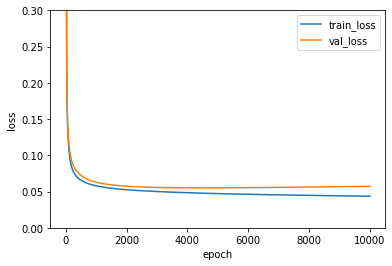

In [15]:
plt.ylim(0,0.3)
plt.plot(single_layer.losses) 
plt.plot(single_layer.val_losses) 
plt.ylabel('loss')  
plt.xlabel('epoch') 
plt.legend(['train_loss','val_loss']) 
plt.show() 

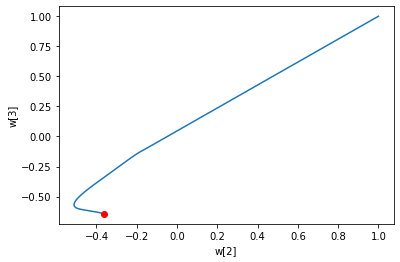

In [18]:
w2 = []
w3 = [] 
for w in single_layer.w_history:  
  w2.append(w[2]) 
  w3.append(w[3]) 
plt.plot(w2,w3) 
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]') 
plt.ylabel('w[3]') 
plt.show() 